In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

In [7]:
# Suppress the specific DataConversionWarning
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


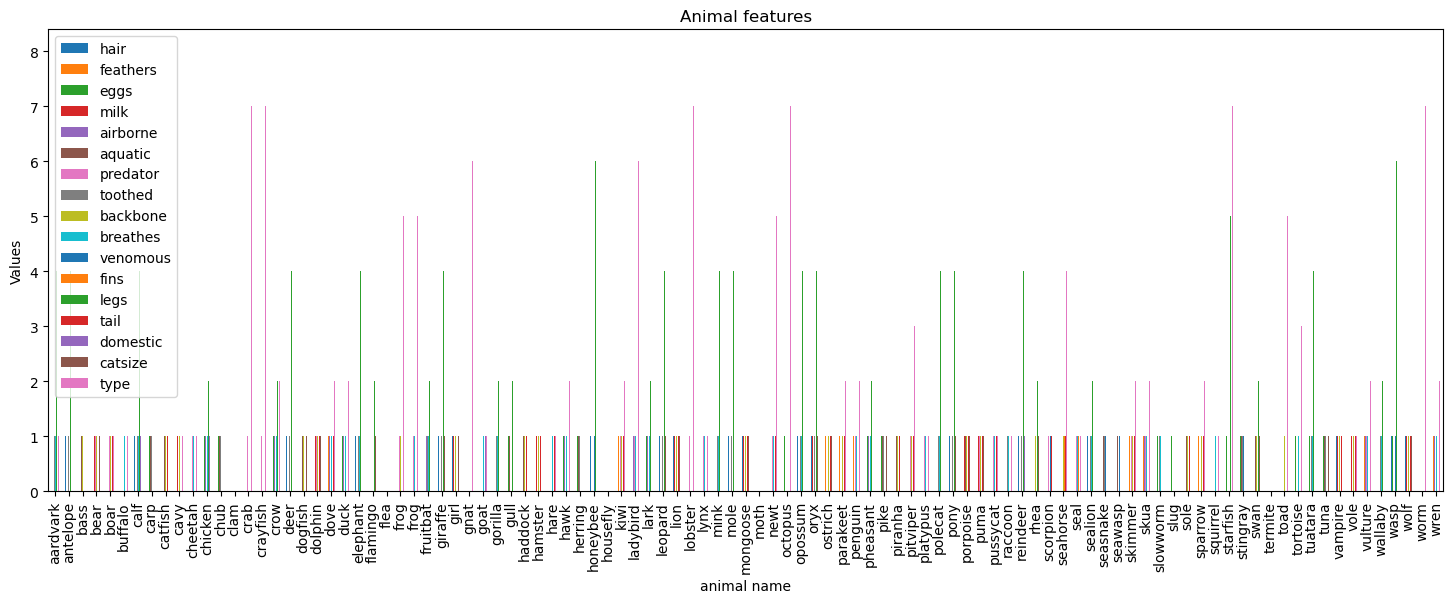

In [9]:
df.set_index('animal name', inplace=True)
df.plot(kind='bar', figsize=(18, 6))
plt.title('Animal features')
plt.ylabel('Values')
plt.show()

In [10]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [12]:
df[df.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


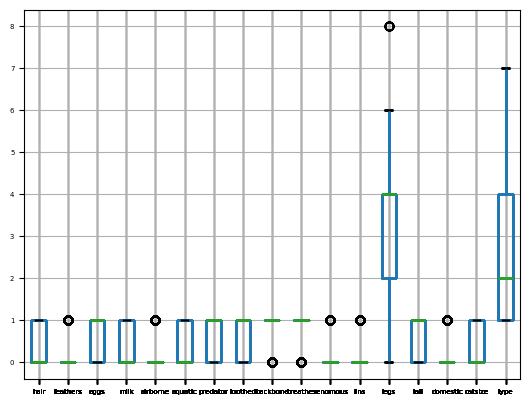

In [13]:
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col
#find outliers of numeric column
import matplotlib.pyplot as plt
for i in num_col:
    df.boxplot(column = num_col, fontsize = 5)

plt.show()

In [14]:
# Separate features and target variable
target = df['type']
feature = df.drop(columns=['type'])


In [15]:
print(df.columns)

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [16]:
# Getting the number of rows and columns
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display first few rows after encoding
df.head()


Rows: 101, Columns: 17


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:



# Select top k features using ANOVA F-test
#selector = SelectKBest(score_func=f_classif, k=15)  # Selecting top 15 features
#X_selected = selector.fit_transform(feature, target)

# Get selected feature names
#selected_features = feature.columns[selector.get_support()]
#selected_features

In [18]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (80, 16)
Testing Features (X_test): (21, 16)
Training Target (y_train): (80,)
Testing Target (y_test): (21,)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Check the shape of the data after scaling
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (80, 16)
X_test_scaled shape: (21, 16)


In [20]:
k=3
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
# Train the KNN classifier on the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of KNN Classifier with K={k} and Euclidean Distance: {accuracy * 100:.2f}%')

Accuracy of KNN Classifier with K=3 and Euclidean Distance: 100.00%


In [21]:
# Create a GridSearchCV object
# Define the parameter grid
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(knn, param_grid)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [22]:
# Print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions with the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Best KNN Classifier: {accuracy * 100:.2f}%')

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Accuracy of Best KNN Classifier: 95.24%


In [23]:
# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Print the evaluation results
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 95.24%
Precision: 0.71
Recall: 0.71
F1 Score: 0.71


In [24]:
# Create a mesh grid for plotting decision boundaries
#x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
#y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
 #                    np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
#Z = knn.predict(np.c_[xx.ravel(), yy..ravel()])
#Z = Z.reshape(xx.shape)
# Plot the decision boundaries
#plt.figure(figsize=(8, 6))
#plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
#plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
#plt.title(f"KNN Decision Boundaries (k={k})")
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.colorbar()
#plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 18.3+ KB
None
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000

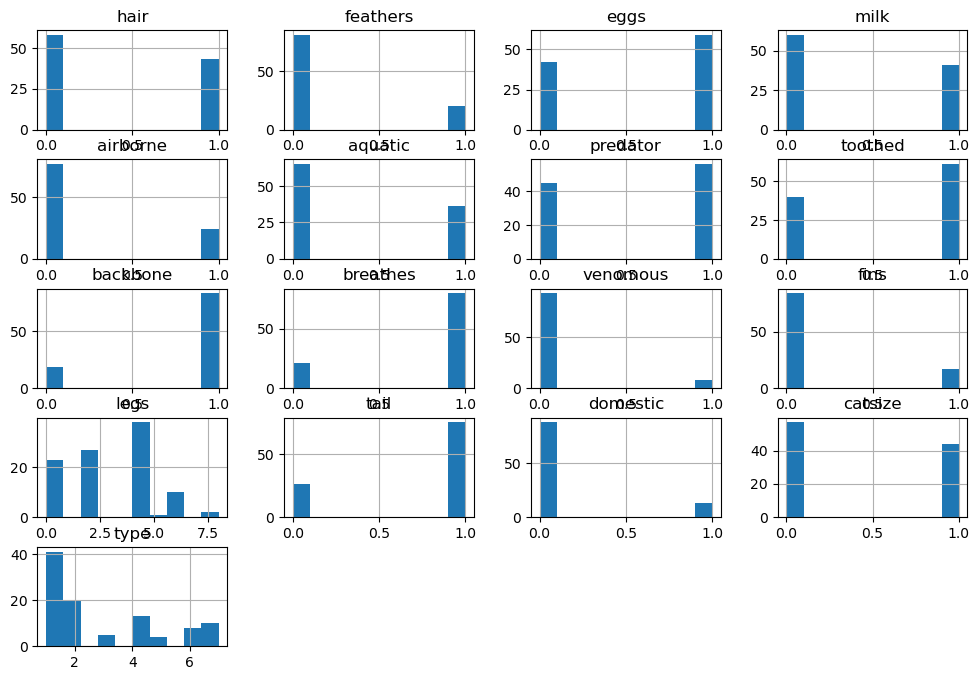

KeyError: 'target_column'

In [ ]:

# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure 'df' is your dataframe variable)
print(df.info())
print(df.describe())

# Checking missing values
print("Missing values:\n", df.isnull().sum())

# Visualizing distributions
df.hist(figsize=(12, 8))
plt.show()

# Pairplot for feature relationships
sns.pairplot(df, hue='target_column')  # Replace 'target_column' with your actual target
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:

# Feature Selection using Variance Threshold
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust threshold based on variance importance
selected_features = selector.fit_transform(df.drop(columns=['target_column']))  # Exclude target

# Check selected feature indices
selected_feature_indices = selector.get_support(indices=True)
print("Selected Feature Indices:", selected_feature_indices)

# Update dataframe with selected features
df_selected = df.iloc[:, selected_feature_indices]
df_selected['target_column'] = df['target_column']


In [ ]:

# Fix scatter plot color error
import numpy as np

# Ensure 'target_column' is categorical and converted properly
if df['target_column'].dtype == 'object':
    df['target_column'] = pd.factorize(df['target_column'])[0]

plt.scatter(df['feature_x'], df['feature_y'], c=df['target_column'], cmap='viridis')  # Ensure valid colors
plt.colorbar(label='Target Classes')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()
